<a href="https://colab.research.google.com/github/vislupus/machine-learning/blob/master/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.2.0


In [ ]:
wine_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv', parse_dates=True, encoding = "cp1252")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.groupby('quality').count().reset_index()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,10,10,10,10,10,10,10,10,10,10,10
1,4,53,53,53,53,53,53,53,53,53,53,53
2,5,681,681,681,681,681,681,681,681,681,681,681
3,6,638,638,638,638,638,638,638,638,638,638,638
4,7,199,199,199,199,199,199,199,199,199,199,199
5,8,18,18,18,18,18,18,18,18,18,18,18


In [ ]:
wine_data['quality'].replace(to_replace={3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}, inplace=True)

In [ ]:
X = wine_data[['fixed acidity',
               'volatile acidity',
               'citric acid',
               'residual sugar',
               'chlorides',
               'free sulfur dioxide',
               'total sulfur dioxide',
               'density',
               'pH',
               'sulphates',
               'alcohol']]

y = wine_data['quality']

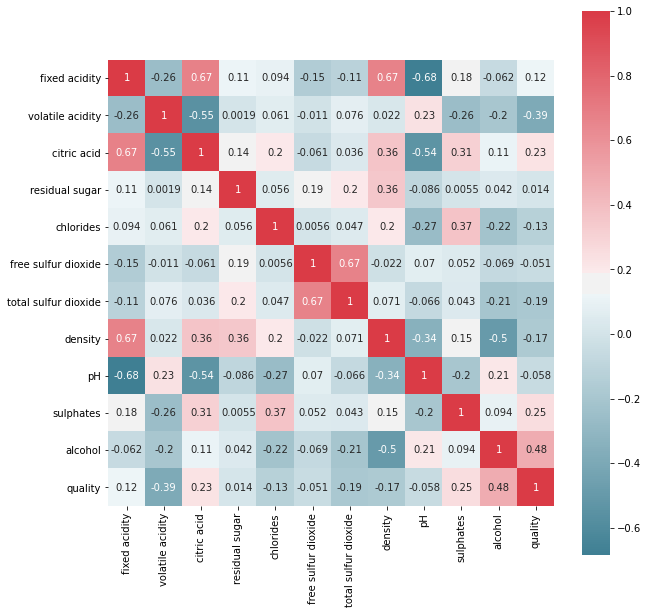

In [ ]:
corr = wine_data.corr(method = "pearson")
# corr = wine_data.corr(method = "spearman")
# corr = wine_data.corr(method = "kendall")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape[1])
print(y.unique())

11
[2 3 4 1 5 0]


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=35, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=72, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=42, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='softmax')
])

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_881 (Dense)            (None, 35)                420       
_________________________________________________________________
dense_882 (Dense)            (None, 52)                1872      
_________________________________________________________________
dense_883 (Dense)            (None, 72)                3816      
_________________________________________________________________
dense_884 (Dense)            (None, 52)                3796      
_________________________________________________________________
dropout_180 (Dropout)        (None, 52)                0         
_________________________________________________________________
dense_885 (Dense)            (None, 52)                2756      
_________________________________________________________________
dense_886 (Dense)            (None, 42)              

In [ ]:
cl = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50)

Epoch 1/50
40/40 [==============================] - 0s 5ms/step - loss: 1.7346 - accuracy: 0.4097 - val_loss: 1.6702 - val_accuracy: 0.4219
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 1.6256 - accuracy: 0.4269 - val_loss: 1.5580 - val_accuracy: 0.4219
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 1.5236 - accuracy: 0.4269 - val_loss: 1.4490 - val_accuracy: 0.4219
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 1.4314 - accuracy: 0.4269 - val_loss: 1.3476 - val_accuracy: 0.4219
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3439 - accuracy: 0.4269 - val_loss: 1.2614 - val_accuracy: 0.4219
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2847 - accuracy: 0.4277 - val_loss: 1.2026 - val_accuracy: 0.4219
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2427 - accuracy: 0.4285 - val_loss: 1.1701 - val_accuracy: 0.4219
Epoch 8/50
40/40 [==

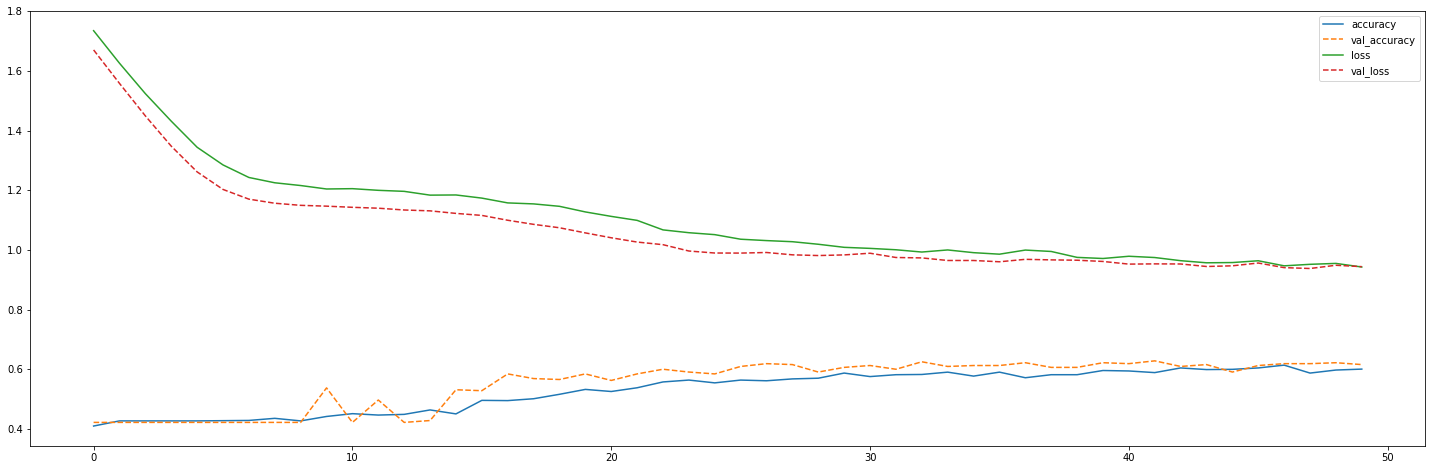

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))

plt.plot(cl.history['accuracy'], label='accuracy')
plt.plot(cl.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(cl.history['loss'], label='loss')
plt.plot(cl.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_test_list=list(y_test)
total=len(y_test_list)
correct=0

# for i in range(10):
#   print(f'{i+1} - {y_pred[4][i]:.3f} - {y_test_list[4]}')

for i in range(total):
  # print(f'{np.argmax(y_pred[i])} - {np.amax(y_pred[i])} - {y_test_list[i]}')
  if(np.argmax(y_pred[i])==y_test_list[i]):
    correct+=1
print(f'{correct}/{total}')
print(correct/total)

197/320
0.615625


Text(0.5, 24.0, 'Predicted label')

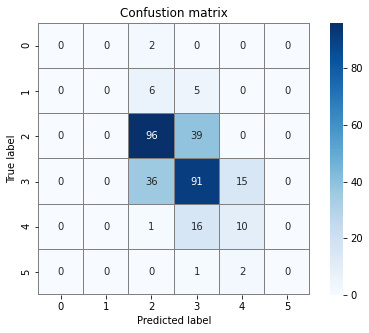

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
cm = tf.math.confusion_matrix(y_test, p_test)

f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')